In [ ]:
import sys
!{sys.executable} -m pip install --upgrade plotnine

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr 11 19:12:28 2021

@author: pmarc
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt
import statsmodels.api as sm
import scipy.stats as sts
import math

donnee = pd.read_csv('../Fichiers/Poissonsv0r2.csv')
stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)


/tmp/ipykernel_158658/1174140708.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
/tmp/ipykernel_158658/1174140708.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


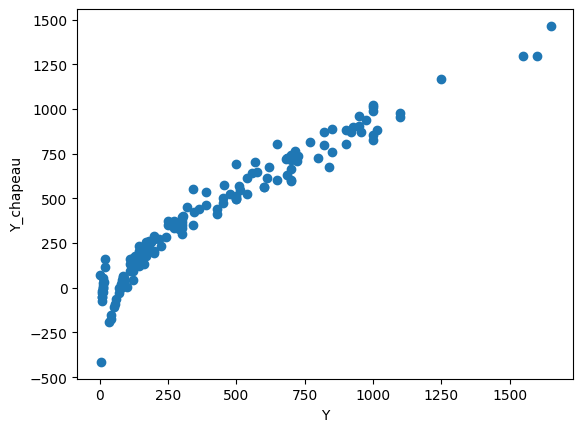

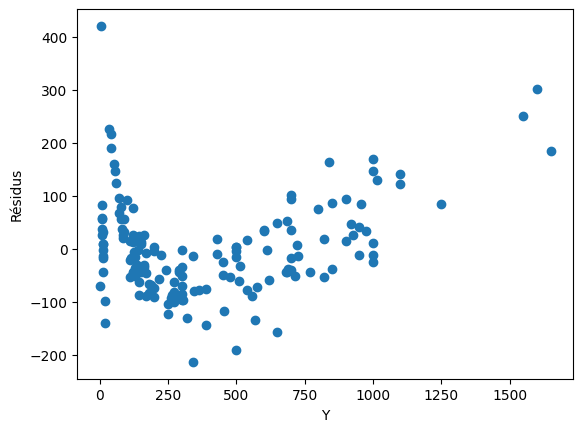

Text(0.5, 0, 'Erreurs')

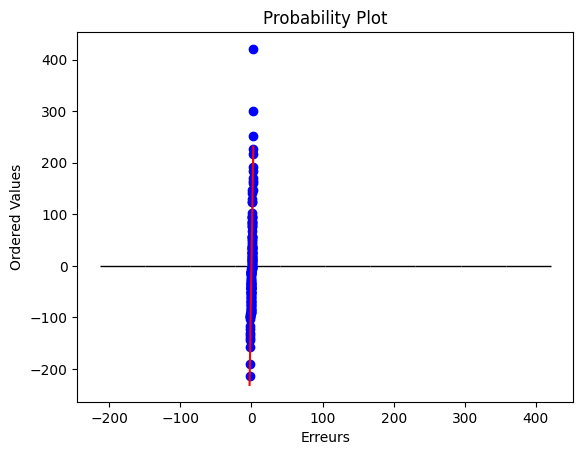

In [7]:

#X=donnee.drop('Espèces', 1)
X=pd.get_dummies(donnee)
X=X.drop('Espèces_Éperlan', 1)
MatriceR = X.corr()

X=X.drop('Poids (g)', 1)
Y=donnee["Poids (g)"]

"Développement des formules au long"

Xmat=X.assign(const=1).values
Ymat=Y.values.reshape(-1,1)
n=Xmat.shape[0]
p=Xmat.shape[1]

Beta_chap=np.dot(np.dot(np.linalg.inv(np.dot(Xmat.T,Xmat)),Xmat.T),Ymat)
Y_chap=np.dot(Xmat,Beta_chap)
C=np.linalg.inv(np.dot(Xmat.T,Xmat))
c_ii=np.diagonal(C)
y_bar=Ymat.mean()
plt.scatter(Ymat, Y_chap)
plt.xlabel("Y")
plt.ylabel("Y_chapeau")
plt.show()


SSR=((Y_chap-y_bar)**2).sum()
SSE=((Ymat-Y_chap)**2).sum()
SST=((Ymat-y_bar)**2).sum()
MSR=SSR/(p-1)
MSE=SSE/(n-p)
MST=SST/(n-1)
R2=SSR/SST
R2_ajust=1-(SSE/(n-p))/(SST/(n-1))
F0=MSR/MSE
p_value=sts.f.sf(abs(F0),p-1,n-p)


t0=Beta_chap/(MSE*c_ii.reshape(-1,1))**0.5
p_value=sts.t.sf(abs(t0),df=(n-p))*2
Betas_min=Beta_chap-sts.t.isf(0.05/2,n-p)*(MSE*c_ii.reshape(-1,1))**0.5
Betas_max=Beta_chap+sts.t.isf(0.05/2,n-p)*(MSE*c_ii.reshape(-1,1))**0.5
Compilation_Beta=pd.concat([pd.DataFrame(Betas_min),pd.DataFrame(Beta_chap),pd.DataFrame(Betas_max),pd.DataFrame(p_value)],axis=1)
Compilation_Beta.columns=['Min','Betas','Max','p-value']

for i in range(p-1):
    Compilation_Beta.rename(index={(i):X.columns[i]}, inplace=True)
Compilation_Beta.rename(index={(p-1):'Origine'}, inplace=True)


#Y_chap_min=[]
#Y_chap_max=[]
#Y_chap_p_value=[]
#for i in range(n):
#    Y_chap_min.append(Y_chap[i-1]-sts.t.isf(0.05/2,n-p)*(MSE*np.dot(np.dot(Xmat[i-1,:],C),Xmat[i-1,:].T))**0.5)
#    Y_chap_max.append(Y_chap[i-1]+sts.t.isf(0.05/2,n-p)*(MSE*np.dot(np.dot(Xmat[i-1,:],C),Xmat[i-1,:].T))**0.5)
#    t0_y=Y_chap[i-1]/(MSE*np.dot(np.dot(Xmat[i-1,:],C),Xmat[i-1,:].T))**0.5
#    Y_chap_p_value.append(sts.t.sf(abs(t0_y),df=(n-p))*2)


Epsilon=Ymat-Y_chap
plt.figure(1)
plt.plot(Ymat, Epsilon, 'o')
plt.xlabel("Y")
plt.ylabel("Résidus")
plt.show()
sts.probplot(Epsilon[:,0],dist=sts.norm, plot=plt.figure().add_subplot(111))
ax=plt.hist(Epsilon,density=True, bins = 10, color = 'blue', edgecolor = 'black')
plt.xlabel("Erreurs")


In [8]:



"Avec les fonctions"

"Ronde 1"
modele=sm.OLS(Y,X.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(X.assign(const=1))
resultats.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Poids (g)   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     195.7
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           6.85e-82
Time:                        00:12:54   Log-Likelihood:                -941.46
No. Observations:                 159   AIC:                             1907.
Df Residuals:                     147   BIC:                             1944.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Longueur 1 (cm)         -80.3030     36.279     -2.214      0.028    -151.998      -8.608
Longueur 2 (cm)          79.8886     45.718      1.747      0.083     -10.461     170.238
Longueur 3 (cm)          32.5354     29.300      1.110      0.269     -25.369      90.439
Hauteur (cm)              5.2510     13.056      0.402      0.688     -20.551      31.053
Épaisseur (cm)           -0.5154     23.913     -0.022      0.983     -47.773      46.742
Espèces_Brochet        -654.5027     74.067     -8.837      0.000    -800.877    -508.128
Espèces_Daurades       -446.0733    119.430     -3.735      0.000    -682.095    -210.051
Espèces_Gardon         -343.0334     47.145     -7.276      0.000    -436.204    -249.863
Espèces_Parkki         -281.3507     66.468     -4.233      0.000    -412.707    -149.995
Espèces_Perche         -308.1244     42.941     -7.176      0.000    -392.985    -223.263
Espèces_Poisson blanc  -352.1991     62.857     -5.603      0.000    -476.419    -227.979
const                  -472.2588     36.278    -13.018      0.000    -543.952    -400.566
==============================================================================
Omnibus:                       43.558   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.422
Skew:                           1.184   Prob(JB):                     7.00e-22
Kurtosis:                       6.016   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:

"Ronde 2"
X=X.drop('Épaisseur (cm)', 1)
modele=sm.OLS(Y,X.assign(const=1))
resultats=modele.fit()
ychap = resultats.predict(X.assign(const=1))
resultats.summary()


/tmp/ipykernel_158658/2944092256.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Poids (g)   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     216.8
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           4.53e-83
Time:                        00:12:59   Log-Likelihood:                -941.46
No. Observations:                 159   AIC:                             1905.
Df Residuals:                     148   BIC:                             1939.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Longueur 1 (cm)         -80.3555     36.074     -2.228      0.027    -151.642      -9.069
Longueur 2 (cm)          79.9867     45.337      1.764      0.080      -9.605     169.578
Longueur 3 (cm)          32.4518     28.944      1.121      0.264     -24.745      89.649
Hauteur (cm)              5.0868     10.567      0.481      0.631     -15.794      25.968
Espèces_Brochet        -654.1980     72.460     -9.028      0.000    -797.388    -511.008
Espèces_Daurades       -445.0102    108.402     -4.105      0.000    -659.225    -230.795
Espèces_Gardon         -343.0159     46.979     -7.301      0.000    -435.852    -250.180
Espèces_Parkki         -280.8292     61.700     -4.552      0.000    -402.756    -158.902
Espèces_Perche         -308.3749     41.199     -7.485      0.000    -389.789    -226.961
Espèces_Poisson blanc  -352.2470     62.605     -5.626      0.000    -475.963    -228.531
const                  -472.0747     35.138    -13.435      0.000    -541.512    -402.637
==============================================================================
Omnibus:                       43.630   Durbin-Watson:                   0.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.697
Skew:                           1.185   Prob(JB):                     6.10e-22
Kurtosis:                       6.021   Cond. No.                         997.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:

"Ronde 3"
X=X.drop('Hauteur (cm)', 1)
modele=sm.OLS(Y,X.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(X.assign(const=1))
resultats.summary()


/tmp/ipykernel_158658/1977580931.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Poids (g)   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     242.1
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           3.17e-84
Time:                        00:13:08   Log-Likelihood:                -941.59
No. Observations:                 159   AIC:                             1903.
Df Residuals:                     149   BIC:                             1934.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Longueur 1 (cm)         -82.0472     35.810     -2.291      0.023    -152.808     -11.287
Longueur 2 (cm)          79.9316     45.220      1.768      0.079      -9.424     169.287
Longueur 3 (cm)          35.4408     28.197      1.257      0.211     -20.278      91.159
Espèces_Brochet        -678.1863     52.470    -12.925      0.000    -781.867    -574.506
Espèces_Daurades       -421.2990     96.316     -4.374      0.000    -611.621    -230.977
Espèces_Gardon         -339.4185     46.261     -7.337      0.000    -430.831    -248.006
Espèces_Parkki         -262.5343     48.481     -5.415      0.000    -358.334    -166.735
Espèces_Perche         -303.6726     39.921     -7.607      0.000    -382.557    -224.789
Espèces_Poisson blanc  -345.3412     60.782     -5.682      0.000    -465.448    -225.234
const                  -480.0985     30.854    -15.560      0.000    -541.066    -419.131
==============================================================================
Omnibus:                       41.275   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.169
Skew:                           1.136   Prob(JB):                     4.34e-20
Kurtosis:                       5.880   Cond. No.                         914.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:

"Ronde 4"
X=X.drop('Longueur 3 (cm)', 1)
modele=sm.OLS(Y,X.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(X.assign(const=1))
resultats.summary()


/tmp/ipykernel_158658/3769636638.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Poids (g)   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     271.1
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           4.08e-85
Time:                        00:13:12   Log-Likelihood:                -942.43
No. Observations:                 159   AIC:                             1903.
Df Residuals:                     150   BIC:                             1930.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Longueur 1 (cm)         -82.4621     35.877     -2.298      0.023    -153.352     -11.572
Longueur 2 (cm)         117.7647     33.811      3.483      0.001      50.957     184.572
Espèces_Brochet        -670.3520     52.199    -12.842      0.000    -773.492    -567.212
Espèces_Daurades       -317.6614     49.874     -6.369      0.000    -416.207    -219.116
Espèces_Gardon         -304.2709     36.924     -8.241      0.000    -377.228    -231.313
Espèces_Parkki         -232.4103     42.224     -5.504      0.000    -315.841    -148.980
Espèces_Perche         -315.8757     38.797     -8.142      0.000    -392.535    -239.217
Espèces_Poisson blanc  -317.6313     56.752     -5.597      0.000    -429.769    -205.494
const                  -464.4567     28.287    -16.419      0.000    -520.349    -408.564
==============================================================================
Omnibus:                       37.879   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.274
Skew:                           1.068   Prob(JB):                     1.66e-17
Kurtosis:                       5.665   Cond. No.                         571.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:

"Ronde 5"
X=X.drop('Longueur 1 (cm)', 1)
modele=sm.OLS(Y,X.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(X.assign(const=1))
resultats.summary()



/tmp/ipykernel_158658/3151760324.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Poids (g)   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     300.5
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           3.01e-85
Time:                        00:13:16   Log-Likelihood:                -945.18
No. Observations:                 159   AIC:                             1906.
Df Residuals:                     151   BIC:                             1931.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Longueur 2 (cm)          40.0938      1.126     35.592      0.000      37.868      42.319
Espèces_Brochet        -638.0563     50.980    -12.516      0.000    -738.782    -537.330
Espèces_Daurades       -242.8222     38.310     -6.338      0.000    -318.515    -167.130
Espèces_Gardon         -274.2422     35.021     -7.831      0.000    -343.437    -205.047
Espèces_Parkki         -194.1113     39.343     -4.934      0.000    -271.846    -116.377
Espèces_Perche         -269.2939     33.548     -8.027      0.000    -335.579    -203.009
Espèces_Poisson blanc  -257.8066     51.142     -5.041      0.000    -358.853    -156.760
const                  -466.7963     28.667    -16.283      0.000    -523.436    -410.156
==============================================================================
Omnibus:                       34.061   Durbin-Watson:                   0.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.145
Skew:                           0.983   Prob(JB):                     4.33e-15
Kurtosis:                       5.474   Cond. No.                         346.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

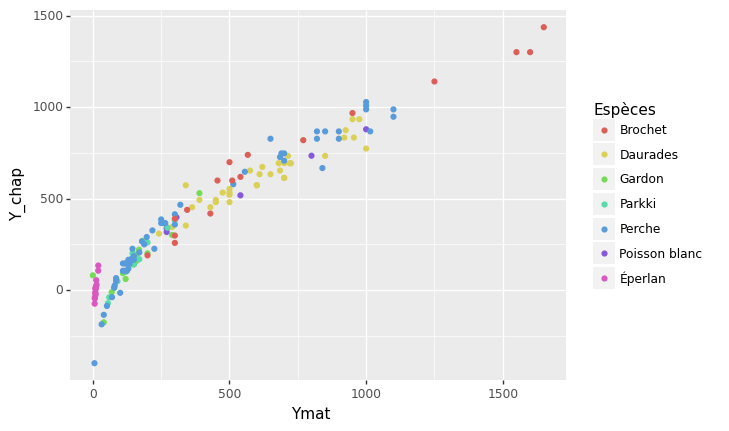

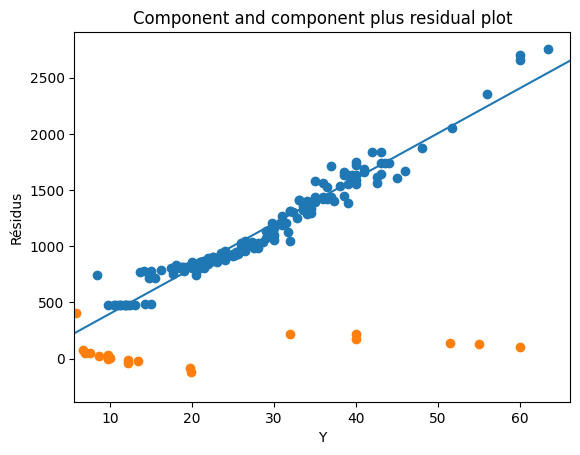

Text(0.5, 0, 'Y (Poids (g))')

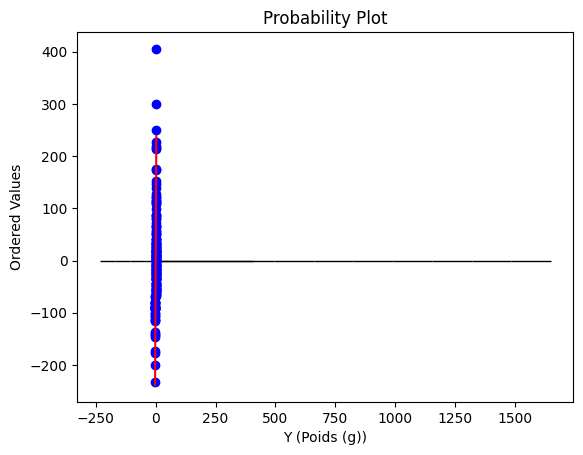

In [13]:

import plotnine as p9

graph = p9.ggplot(data=donnee,
           mapping=p9.aes(x="Ymat", y="Y_chap", color='Espèces'))
print(graph + p9.geom_point())


sm.graphics.plot_ccpr(resultats,'Longueur 2 (cm)')

Epsilon=Ymat-Y_chap.values.reshape(-1,1)
plt.figure(1)
plt.plot(Ymat, Epsilon, 'o')
plt.xlabel("Y")
plt.ylabel("Résidus")
plt.show()
sts.probplot(Epsilon[:,0],dist=sts.norm, plot=plt.figure().add_subplot(111))
ax=plt.hist(Epsilon,density=True, bins = 10, color = 'blue', edgecolor = 'black')
plt.xlabel("Erreurs")

ax=plt.hist(Ymat,density=True, bins = 10, color = 'blue', edgecolor = 'black')
plt.xlabel("Y (Poids (g))")